In [36]:
from cobra.io import read_sbml_model
yeast_model = read_sbml_model('models/iMM904_progesterone_fixed.xml') # import model of progesterone producing yeast strain
growth = yeast_model.reactions.BIOMASS_SC5_notrace
progesterone = yeast_model.reactions.R02216

yeast_model

Name,iMM904
Memory address,0x0291d0f359a0
Number of metabolites,1235
Number of reactions,1587
Number of groups,0
Objective expression,1.0*BIOMASS_SC5_notrace - 1.0*BIOMASS_SC5_notrace_reverse_93090
Compartments,"cytosol, extracellular space, mitochondria, peroxisome/glyoxysome, endoplasmic reticulum, vacuole, golgi apparatus, nucleus"


In [37]:
yeast_model.medium # nutrients available in medium

{'EX_fe2_e': 999999.0,
 'EX_glc__D_e': 10.0,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_nh4_e': 999999.0,
 'EX_o2_e': 2.0,
 'EX_pi_e': 999999.0,
 'EX_methylpentanal_e': 999999.0}

In [50]:
medium = yeast_model.medium
medium["EX_glc__D_e"] = 10000 # a lot of glucose is available
medium["EX_o2_e"] = 10000 # a lot of oxygen is available
medium["EX_methylpentanal_e"] = 1
yeast_model.medium = medium

yeast_model.medium

{'EX_fe2_e': 999999.0,
 'EX_glc__D_e': 10000,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_nh4_e': 999999.0,
 'EX_o2_e': 10000,
 'EX_pi_e': 999999.0,
 'EX_methylpentanal_e': 1}

In [39]:
from cobra.flux_analysis import production_envelope

prod_env_growth = production_envelope(yeast_model, ["EX_glc__D_e", "EX_o2_e"])
prod_env_growth

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,54.829111,5.745196,NaN,-1000.000000,-1000.000000
1,EX_glc__D_e,0.0,0.0,NaN,53.193156,5.573774,NaN,-1000.000000,-947.368421
2,EX_glc__D_e,0.0,0.0,NaN,51.557200,5.402353,NaN,-1000.000000,-894.736842
3,EX_glc__D_e,0.0,0.0,NaN,49.921244,5.230931,NaN,-1000.000000,-842.105263
4,EX_glc__D_e,0.0,0.0,NaN,48.285288,5.059510,NaN,-1000.000000,-789.473684
...,...,...,...,...,...,...,...,...,...
395,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-210.526316
396,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-157.894737
397,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-105.263158
398,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-52.631579


In [40]:
import numpy as np
np.nan_to_num(np.array(prod_env_growth['flux_maximum']).reshape(20,20))

array([[5.48291114e+01, 5.31931556e+01, 5.15571998e+01, 4.99212439e+01,
        4.82852881e+01, 4.66493323e+01, 4.50133765e+01, 4.33774207e+01,
        4.17414648e+01, 4.01055090e+01, 3.84695532e+01, 3.68335974e+01,
        3.51976416e+01, 3.35616857e+01, 3.19257299e+01, 3.02897741e+01,
        2.86306153e+01, 2.66658104e+01, 2.43861506e+01, 0.00000000e+00],
       [5.35787729e+01, 5.19428170e+01, 5.03068612e+01, 4.86709054e+01,
        4.70349496e+01, 4.53989938e+01, 4.37630379e+01, 4.21270821e+01,
        4.04911263e+01, 3.88551705e+01, 3.72192147e+01, 3.55832588e+01,
        3.39473030e+01, 3.23113472e+01, 3.06753914e+01, 2.90394356e+01,
        2.73894139e+01, 2.55017973e+01, 2.32221376e+01, 0.00000000e+00],
       [5.23284343e+01, 5.06924785e+01, 4.90565227e+01, 4.74205669e+01,
        4.57846110e+01, 4.41486552e+01, 4.25126994e+01, 4.08767436e+01,
        3.92407878e+01, 3.76048320e+01, 3.59688761e+01, 3.43329203e+01,
        3.26969645e+01, 3.10610087e+01, 2.94250529e+01, 2.7789

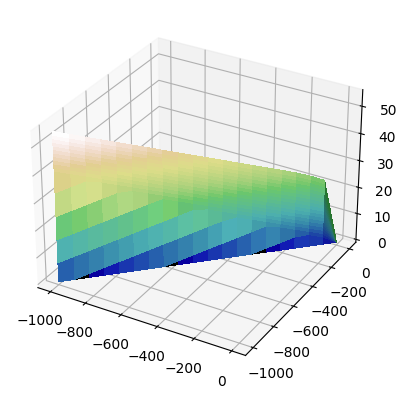

In [41]:
# prod_env_growth.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)
#prod_env.plot(x='carbon_source', y='flux_maximum');
# prod_env_growth.plot_matplotlib();
# Set up plot
import matplotlib
from matplotlib import cm
from matplotlib.colors import LightSource
%matplotlib inline  
import matplotlib.pyplot as plt
ls = LightSource(270, 45)
z = np.nan_to_num(np.array(prod_env_growth['flux_maximum']).reshape(20,20))
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
plot_prod_env_growth = ax.plot_surface(prod_env_growth['EX_glc__D_e'][::20], 
                                        prod_env_growth['EX_o2_e'][:20], 
                                        z, 
                                        rstride=1, cstride=1, linewidth=0, antialiased=False, shade=False, facecolors=rgb)

In [42]:
prod_env_prog = production_envelope(yeast_model, ["EX_glc__D_e", "EX_o2_e"], objective=progesterone)
prod_env_prog

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-1000.000000,-1000.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-1000.000000,-947.368421
2,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-1000.000000,-894.736842
3,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-1000.000000,-842.105263
4,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-1000.000000,-789.473684
...,...,...,...,...,...,...,...,...,...
395,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-210.526316
396,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-157.894737
397,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-105.263158
398,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-52.631579


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Progesterone'>

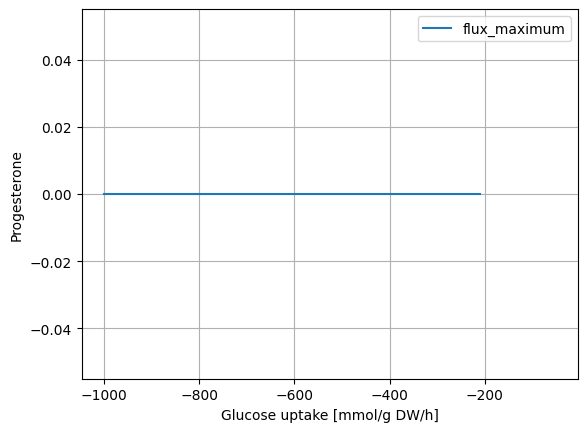

In [43]:
prod_env_prog.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Progesterone", grid = True)

In [51]:
prod_env_growth_simple = production_envelope(yeast_model, "EX_glc__D_e", objective=growth)
prod_env_growth_simple

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,548.398024,5.746316e+00,NaN,-10000.000000
1,EX_glc__D_e,0.0,0.0,NaN,535.893977,5.927253e+00,NaN,-9473.687307
2,EX_glc__D_e,0.0,0.0,NaN,523.389930,6.129476e+00,NaN,-8947.374613
3,EX_glc__D_e,0.0,0.0,NaN,510.885882,6.356977e+00,NaN,-8421.061920
4,EX_glc__D_e,0.0,0.0,NaN,498.381835,6.614812e+00,NaN,-7894.749226
5,EX_glc__D_e,0.0,0.0,NaN,485.877787,6.909479e+00,NaN,-7368.436533
6,EX_glc__D_e,0.0,0.0,NaN,473.325828,7.248746e+00,NaN,-6842.123839
7,EX_glc__D_e,0.0,0.0,NaN,460.557953,7.640975e+00,NaN,-6315.811146
8,EX_glc__D_e,0.0,0.0,NaN,447.674961,8.102433e+00,NaN,-5789.498452
9,EX_glc__D_e,0.0,0.0,NaN,434.791969,8.656183e+00,NaN,-5263.185759


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

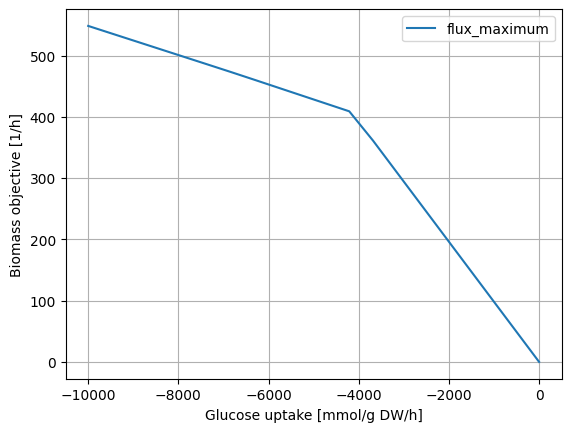

In [52]:
prod_env_growth_simple.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)

In [11]:
prod_env_progesterone_simple = production_envelope(yeast_model, "EX_glc__D_e", objective=progesterone)
prod_env_progesterone_simple

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-1000.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-947.371517
2,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-894.743034
3,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-842.114551
4,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-789.486068
5,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-736.857585
6,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-684.229102
7,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-631.600619
8,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-578.972136
9,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-526.343653


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Progesterrone'>

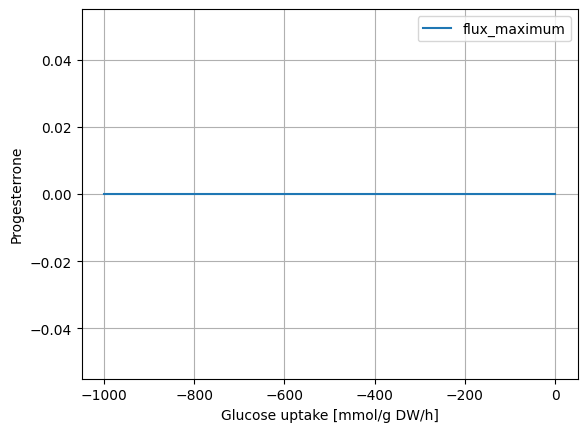

In [12]:
prod_env_progesterone_simple.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Progesterrone", grid = True)

In [33]:
prod_env_2 = production_envelope(yeast_model, reactions=["EX_glc__D_e"], carbon_sources="EX_glc__D_e")
prod_env_2.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,54.829111,5.745196,NaN,-1000.000000
1,EX_glc__D_e,0.0,0.0,NaN,53.578773,5.926060,NaN,-947.371517
2,EX_glc__D_e,0.0,0.0,NaN,52.328434,6.128201,NaN,-894.743034
3,EX_glc__D_e,0.0,0.0,NaN,51.078096,6.355609,NaN,-842.114551
4,EX_glc__D_e,0.0,0.0,NaN,49.827757,6.613334,NaN,-789.486068


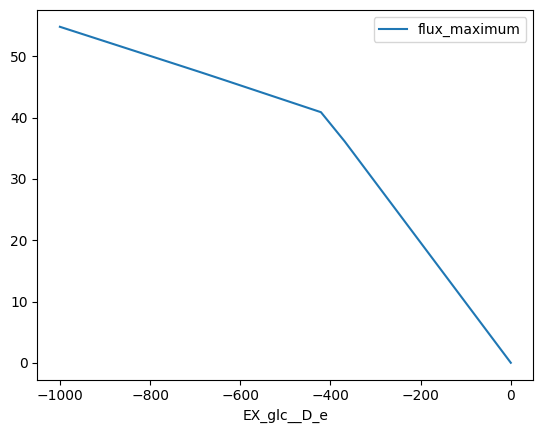

In [35]:
prod_env_2.plot(
    kind='line', x='EX_glc__D_e', y='flux_maximum');

In [ ]:
#data = phenotype_phase_plane.production_envelope(yeast_model, "EX_glc__D_e")
#print(data)
#data.plot_matplotlib();

#phenotypic_phase_plane(model, variables=[model.reactions.EX_glc__D_e], objective=model.metabolites.rHb_c) 

<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

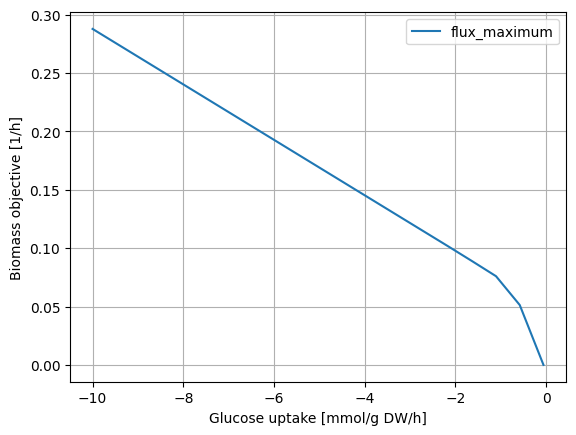

In [5]:
data.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)